<a href="https://www.kaggle.com/code/abhishekgupta18895/amazon-shopping-reviews-using-bert?scriptVersionId=179302353" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-shopping-reviews-daily-updated/amazon_reviews.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data=pd.read_csv(r'/kaggle/input/amazon-shopping-reviews-daily-updated/amazon_reviews.csv')

In [4]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ea5f64a6-5d60-4730-b61d-692dbc34c7e6,Montana,I wish I could give this company 0 stars for t...,1,0,28.10.0.100,2024-05-21 22:52:22,28.10.0.100
1,996e92fe-4947-4609-a132-1024959a4b6d,Matthew Williamson,"works great, easy to use",5,0,28.10.0.100,2024-05-21 22:21:11,28.10.0.100
2,7b744734-8560-4ac9-83d8-5becbebaccfc,johnn Smith,Don't use it at present,5,0,28.10.0.100,2024-05-21 22:05:47,28.10.0.100
3,88f4637d-bcf6-4b4e-af61-13b695f85830,menna atef,خدمة سيئة,1,0,24.16.2.100,2024-05-21 22:03:36,24.16.2.100
4,79c03f0e-3c05-425a-a65f-8e23e2a7e9cd,Theresa Ede,"Great place to shop, especially when your life...",5,0,28.10.0.100,2024-05-21 21:49:32,28.10.0.100


In [5]:
data.drop(columns=['reviewId','userName','thumbsUpCount', 'reviewCreatedVersion','at', 'appVersion'], axis=1, inplace=True)

In [6]:
data.head()

,content,score
0,I wish I could give this company 0 stars for t...,1
1,"works great, easy to use",5
2,Don't use it at present,5
3,خدمة سيئة,1
4,"Great place to shop, especially when your life...",5


In [7]:
data.shape

(51247, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51247 entries, 0 to 51246
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  51246 non-null  object
 1   score    51247 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 800.9+ KB


In [9]:
data.duplicated().sum()

178

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

<Axes: xlabel='score', ylabel='count'>

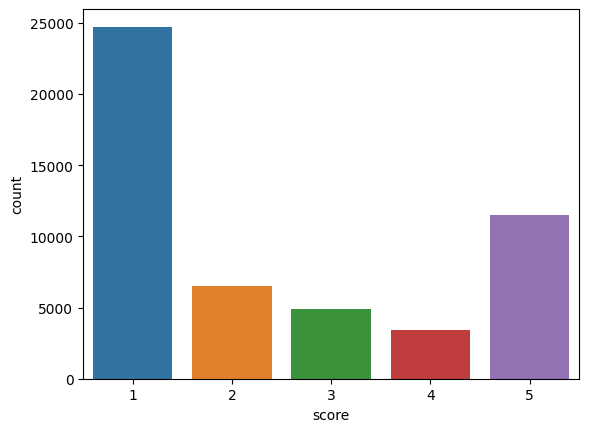

In [12]:
sns.countplot(data=data, x='score')

In [13]:
data['score'] = data['score'].apply(lambda x: 0 if x in [1, 2] else 1)

<Axes: xlabel='score', ylabel='count'>

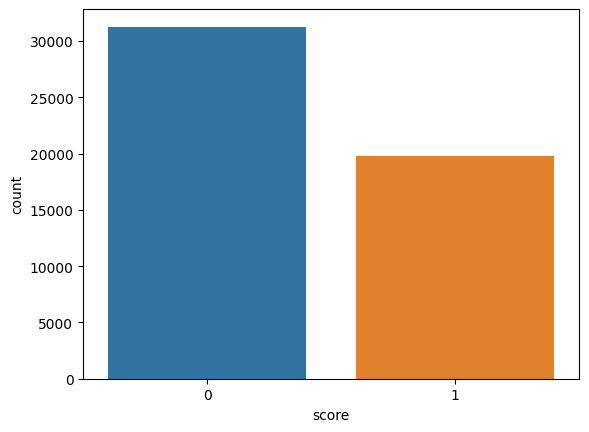

In [14]:
sns.countplot(data=data, x='score')